## Встроенная библиотека - PIL (Pillow)



In [1]:
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt

In [19]:
image = Image.open('data/MIEM_1.jpg')

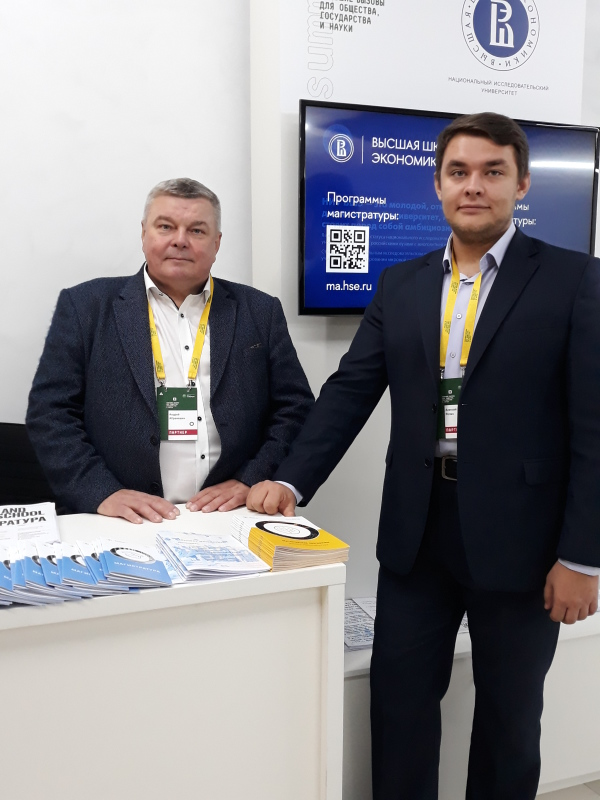

In [3]:
image

In [4]:
type(image)

PIL.JpegImagePlugin.JpegImageFile

In [5]:
image.size

(600, 800)

In [6]:
image.bits

8

In [7]:
image.format

'JPEG'

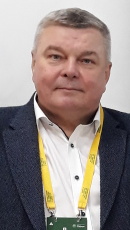

In [8]:
portrait = image.crop((110, 170, 240, 400))
portrait

In [9]:
type(portrait)

PIL.Image.Image

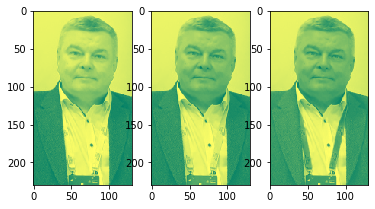

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(6,4), num=1)

for n, p in zip([0, 1, 2], ['R', 'G', 'B']):
    _ = axes[n].imshow(portrait.getchannel(p), cmap="summer")


In [13]:
type(portrait.getchannel('R'))

PIL.Image.Image

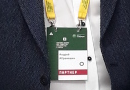

In [14]:
badge = image.crop((110, 360, 240, 450))
badge

In [15]:
pix = badge.load()
type(pix)

PixelAccess

In [16]:
badge_draw = ImageDraw.Draw(badge)

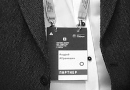

In [17]:
for x in range(badge.size[0]):
    for y in range(badge.size[1]):
        av = int((pix[x, y][0] + pix[x, y][1] + pix[x, y][2]) / 3)
        badge_draw.point((x, y), (av, av, av))
        
badge

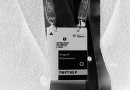

In [16]:
badge2 = image.crop((110, 360, 240, 450))
badge_draw2 = ImageDraw.Draw(badge2)
pix2 = badge2.load()
for x in range(badge2.size[0]):
    for y in range(badge2.size[1]):
        av = 255 - int((pix2[x, y][0] + pix2[x, y][1] + pix2[x, y][2]) / 3)
        badge_draw2.point((x, y), (av, av, av))
        
badge2

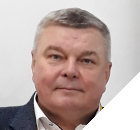

In [18]:
badge2_1 = image.crop((110, 170, 250, 300))
badge_draw2_1 = ImageDraw.Draw(badge2_1)
pix2_1 = badge2_1.load()
for x in range(badge2_1.size[0]):
    for y in range(badge2_1.size[1]):
        if x + y > 210:
            badge_draw2_1.point((x, y), (255, 255, 255))
        
badge2_1

In [2]:
from PIL import ImageFont

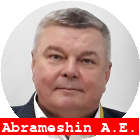

In [24]:
badge2_2 = image.crop((110, 170, 250, 310))
badge_draw2_2 = ImageDraw.Draw(badge2_2)
pix2_2 = badge2_2.load()
for x in range(badge2_2.size[0]):
    for y in range(badge2_2.size[1]):
        if (x-70)*(x-70) + (y-70)*(y-70) > 4900:
            badge_draw2_2.point((x, y), (255, 255, 255))
        
fnt = ImageFont.truetype('/usr/share/fonts/truetype/freefont/FreeMonoBold.ttf', 15)
x1, y1 = badge_draw2_2.textsize("Abrameshin A.E.", font=fnt)
badge_draw2_2.rectangle([0, 118, x1+2, 122+y1], fill="red")
badge_draw2_2.text((2, 120), "Abrameshin A.E.", font=fnt, fill="#FFFFFF")
#badge_draw2.text((40, 40), "Абрамешин А.Е.", font=fnt, fill="red")
badge2_2.save('data/abr22.png')
badge2_2

In [3]:
from sklearn.cluster import DBSCAN
import seaborn as sns
from matplotlib.colors import ListedColormap
from numpy.random import choice

In [46]:
badge3 = image.crop((110, 360, 240, 450))
pix3 = badge3.load()

In [25]:
data = [(x, y, pix3[x, y][0], pix3[x, y][1], pix3[x, y][2]) for x in range(badge3.size[0]) for y in range(badge3.size[1])]

224


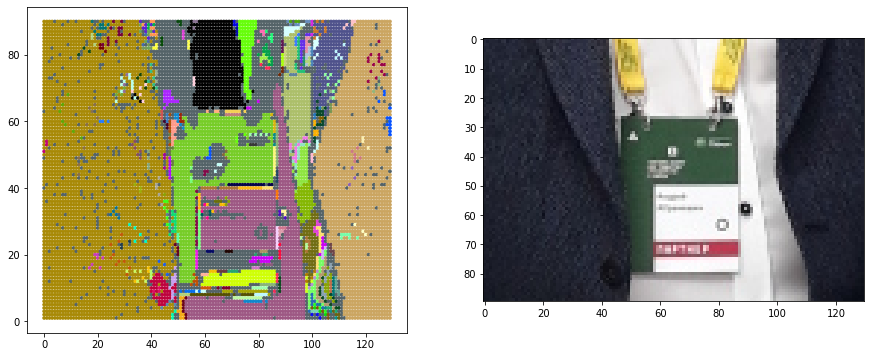

In [29]:
db=DBSCAN(eps=4, min_samples=3)
db_clusters=db.fit_predict(data)
myclr=ListedColormap(choice(list(sns.xkcd_rgb.values()), max(db_clusters)+1)) # Генерируем контрастную карту цветов.
print(max(db_clusters))
fig, axes = plt.subplots(1, 2, figsize=(15,6), num=1)
axes[0].scatter([d[0] for d in data], [badge3.size[1] - d[1] for d in data], s=7, marker = 'o', c=db_clusters, cmap=myclr);
axes[1].imshow(badge3);
#plt.show()


[Scipy Multidimensional Image Processing](https://docs.scipy.org/doc/scipy/reference/ndimage.html)

In [4]:
from scipy import ndimage, misc
import numpy.fft
import numpy as np

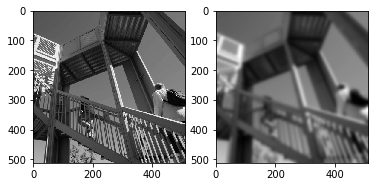

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ascent = misc.ascent()
result = ndimage.gaussian_filter(ascent, sigma=5)
plt.gray()
ax1.imshow(ascent)
ax2.imshow(result)
plt.show()



In [20]:
badge4 = image.crop((110, 360, 240, 450))
pix4 = badge4.load()

red4 = np.array([[pix4[x, y][0] for x in range(badge4.size[0])] for y in range(badge4.size[1])])

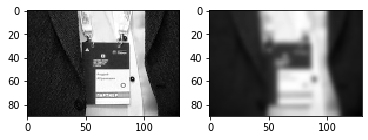

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2)
red4 = np.array([[pix4[x, y][0] for x in range(badge4.size[0])] for y in range(badge4.size[1])])
result = ndimage.gaussian_filter(red4, sigma=2)
plt.gray()
ax1.imshow(red4)
ax2.imshow(result)
plt.show()



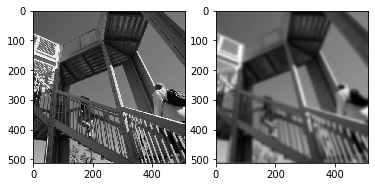

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ascent = misc.ascent()
input_ = numpy.fft.fft2(ascent)
result = ndimage.fourier_gaussian(input_, sigma=4)
result = numpy.fft.ifft2(result)
plt.gray()
ax1.imshow(ascent)
ax2.imshow(result.real)  # the imaginary part is an artifact
plt.show()

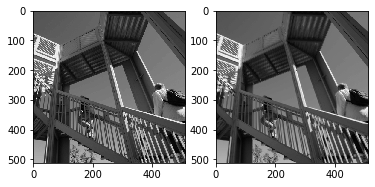

In [35]:
k = np.array([[10,0,0],[0,1,0],[0,0,10]])
fig, (ax1, ax2) = plt.subplots(1, 2)
ascent = misc.ascent()
result = ndimage.convolve(ascent, k, mode='constant', cval=0.0)
plt.gray()
ax1.imshow(ascent)
ax2.imshow(result)
plt.show()



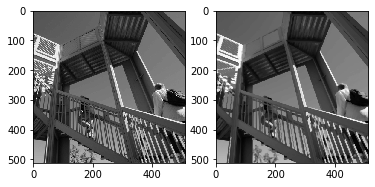

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ascent = misc.ascent()
result = ndimage.median_filter(ascent, size=5)
plt.gray()
ax1.imshow(ascent)
ax2.imshow(result)
plt.show()



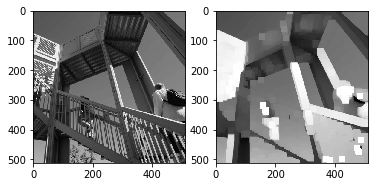

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ascent = misc.ascent()
result = ndimage.maximum_filter(ascent, size=20)
plt.gray()
ax1.imshow(ascent)
ax2.imshow(result)
plt.show()



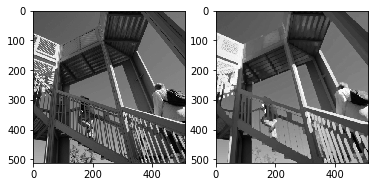

In [44]:
#k = [[True,False, False,False,True],[False, True, False],[True, False, True]]
k = [[1,0,1,0,1],[0,1,0,1,0],[0,0,1,0,0],[0,1,0,1,0],[1,0,1,0,1]]
#k = [[10,10,10,0,0],[10,10,10,0,0],[10,10,10,0,0],[10,10,10,0,0],[10,10,10,0,0]]
fig, (ax1, ax2) = plt.subplots(1, 2)
ascent = misc.ascent()
result = ndimage.maximum_filter(ascent, footprint=k)
plt.gray()
ax1.imshow(ascent)
ax2.imshow(result)
plt.show()



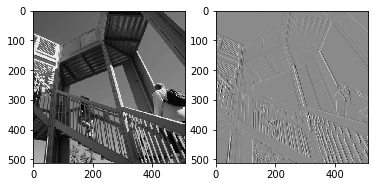

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ascent = misc.ascent()
result = ndimage.sobel(ascent)
plt.gray()
ax1.imshow(ascent)
ax2.imshow(result)
plt.show()



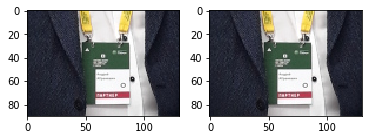

In [47]:
k = np.array([[[0,0,0],[0,0,0],[0,0,0]], [[0,0,0],[0,1,0],[0,0,0]], [[0,0,0],[0,0,0],[0,0,0]]])
#k = np.array([[0,0,0],[0,0,0],[0,0,0]])
fig, (ax1, ax2) = plt.subplots(1, 2)
result = ndimage.convolve(badge3, k, mode='constant', cval=0.0)
ax1.imshow(badge3)
ax2.imshow(result)
plt.show()


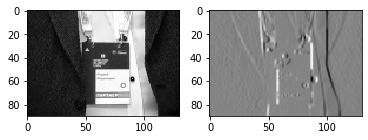

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2)
result = ndimage.sobel(red4)
plt.gray()
ax1.imshow(red4)
ax2.imshow(result)
plt.show()



In [50]:
red4.shape

(90, 130)

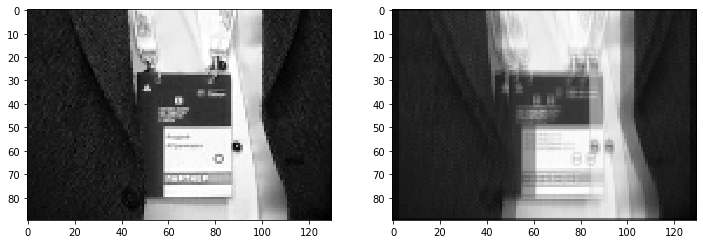

In [51]:
#k = np.array([[0,0,0],[0,1,0],[0,0,0]])
#k = np.array([[0,0,0,0,0],[1,0,0,0,1],[0,0,0,0,0]])
k = np.array([[0.25,0,0,0,0,0,0.25],[0,0,0,0,0,0,0],[0.25,0,0,0,0,0,0.25]])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
result = ndimage.convolve(red4, k, mode='constant', cval=0.0)
plt.gray()
ax1.imshow(red4)
ax2.imshow(result)
plt.show()


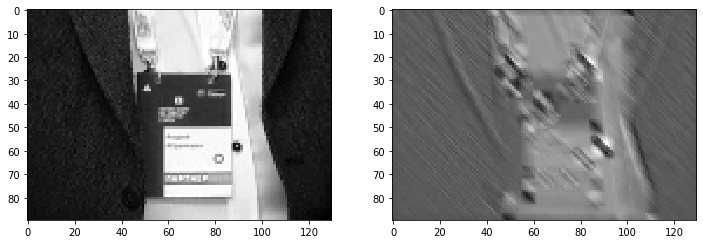

In [53]:
k = np.ones((7,7))
k *= -1
# for i in range(7):
#     k[i,4] = 7
for i in range(7):
    k[i,i] = 7
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
result = ndimage.convolve(red4, k, mode='constant', cval=0.0)
result2 = np.zeros(result.shape)
result2 = result[result>0]
plt.gray()
ax1.imshow(red4)
ax2.imshow(result)
plt.show()


In [41]:
red4[45:55, 50:60]

array([[ 45,  42,  43,  52,  58,  63, 108, 159, 149, 139],
       [ 44,  46,  49,  53,  63,  64, 109, 108, 124, 134],
       [ 47,  47,  49,  49,  54,  67, 124, 111, 155, 184],
       [ 43,  46,  50,  53,  56,  65,  68,  71,  71,  72],
       [ 42,  46,  51,  57,  58,  61,  63,  70,  68,  66],
       [ 39,  43,  46,  53,  57,  60,  62,  66, 127, 184],
       [ 39,  45,  49,  54,  60,  63,  62,  61, 173, 249],
       [ 41,  45,  48,  55,  59,  62,  65,  67, 176, 250],
       [ 41,  43,  45,  51,  56,  60,  65,  64, 178, 246],
       [ 42,  45,  48,  52,  57,  60,  64,  59, 181, 211]])

In [42]:
result[70:80, 55:65]

array([[ -503, -1332, -1955, -2736,   597,  2437,  1809,  1189,  1803,
         1900],
       [ -467, -1167, -1623, -2263,   628,  2173,  1548,  1086,  1626,
         1712],
       [ -452, -1154, -1617, -2191,   625,  2094,  1550,  1069,  1619,
         1692],
       [ -455, -1209, -1757, -2330,   722,  2165,  1608,  1071,  1634,
         1700],
       [ -502, -1359, -2062, -2828,   729,  2415,  1823,  1164,  1775,
         1867],
       [ -538, -1461, -2212, -3070,  1012,  2599,  1558,  1327,  1799,
         1892],
       [ -596, -1549, -2377, -3376,  1233,  2829,  1716,  1486,  1650,
         1683],
       [ -520, -1379, -2110, -3051,  1268,  2664,  1687,  1466,  1440,
         1457],
       [ -328, -1175, -1917, -2794,  1172,  2579,  1780,  1489,  1488,
         1550],
       [ -123,  -754, -1351, -2103,  1185,  2290,  1647,  1438,  1372,
         1467]])

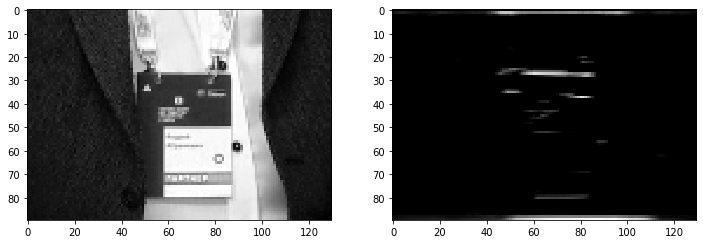

In [43]:
k = np.ones((7,7))
k *= -1
for i in range(7):
    k[4,i] = 5
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
result = ndimage.convolve(red4, k, mode='constant', cval=0.0)
result2 = np.zeros(result.shape)
for i in range(result.shape[0]):
    for j in range(result.shape[1]):
        if result[i,j] > 0:
            result2[i,j] = result[i,j]
plt.gray()
ax1.imshow(red4)
ax2.imshow(result2)
plt.show()


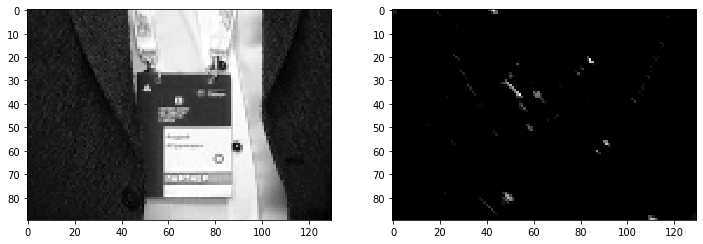

In [44]:
k = np.ones((7,7))
k *= -1
for i in range(7):
    k[i,i] = 5
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
result = ndimage.convolve(red4, k, mode='constant', cval=0.0)
result2 = np.zeros(result.shape)
for i in range(result.shape[0]):
    for j in range(result.shape[1]):
        if result[i,j] > 0:
            result2[i,j] = result[i,j]
plt.gray()
ax1.imshow(red4)
ax2.imshow(result2)
plt.show()


[Scikit-image](https://scikit-image.org/)

Загрузим изображения монет (в качестве альтернативы - фото астронавтки, возможно, только один канал). Проведем "реконструкцию" изображения, заключающуюся в размытии в зависимости от яркости. В случае с монетами получается, что яркие монеты можно отделить от серого фона. С космонавтом так хорошо не получается.

In [5]:
import skimage
import scipy
from skimage.morphology import reconstruction


In [190]:
# Convert to float: Important for subtraction later which won't work with uint8
# Coins
#image = skimage.img_as_float(skimage.data.coins())
# Astronaut
image = skimage.data.astronaut()
# Make it grayscale
#image = (image[:,:,0] + image[:,:,1] + image[:,:,2]) / 3
# Or take the red channel.
image = image[:,:,0]
image = image.astype(np.int)
# Blur the image.
image = scipy.ndimage.gaussian_filter(image, 1)

# Make reconstruction.
seed = np.copy(image)
seed[1:-1, 1:-1] = image.min()
mask = image

dilated = reconstruction(seed, mask, method='dilation')


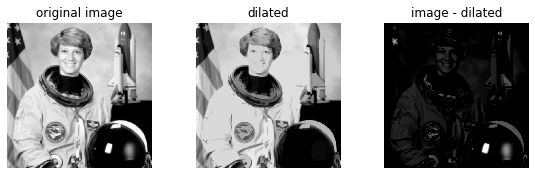

In [191]:
# Draw resulting images.
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,
                                    ncols=3,
                                    figsize=(8, 2.5),
                                    sharex=True,
                                    sharey=True)

ax0.imshow(image, cmap='gray')
ax0.set_title('original image')
ax0.axis('off')

#ax1.imshow(dilated, vmin=image.min(), vmax=image.max(), cmap='gray')
ax1.imshow(dilated, cmap='gray')
ax1.set_title('dilated')
ax1.axis('off')

# Вот здесь - хитрый ход. Так как изображение - это матрица,
# вычтем из изображения полученную матрицу dilated,
# содержающую фон, где он тусклый, и серый цвет, там, где монета.
ax2.imshow(image - dilated, cmap='gray')
ax2.set_title('image - dilated')
ax2.axis('off')

fig.tight_layout()


In [6]:
from skimage.exposure import rescale_intensity
from skimage.color.adapt_rgb import adapt_rgb, each_channel, hsv_value


Библиотека позволяет добавлять обработку изображений при помощи декораторов.

Text(0.5, 1.0, 'Sobel filter computed\n on all the image')

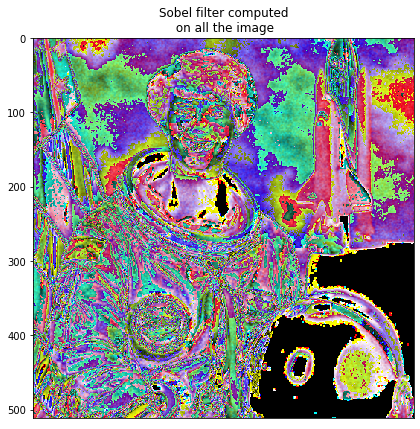

In [192]:
# Без декораторов.
def just_sobel(image):
    return ndimage.filters.sobel(image)

image = skimage.data.astronaut()

fig, ax_sole = plt.subplots(ncols=1, figsize=(14, 7))

# We use 1 - sobel_each(image) but this won't work if image is not normalized
ax_sole.imshow(rescale_intensity(1 -just_sobel(image)))
ax_sole.set_xticks([]), ax_each.set_yticks([])
ax_sole.set_title("Sobel filter computed\n on all the image")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Sobel filter computed\n on (V)alue converted image (HSV)')

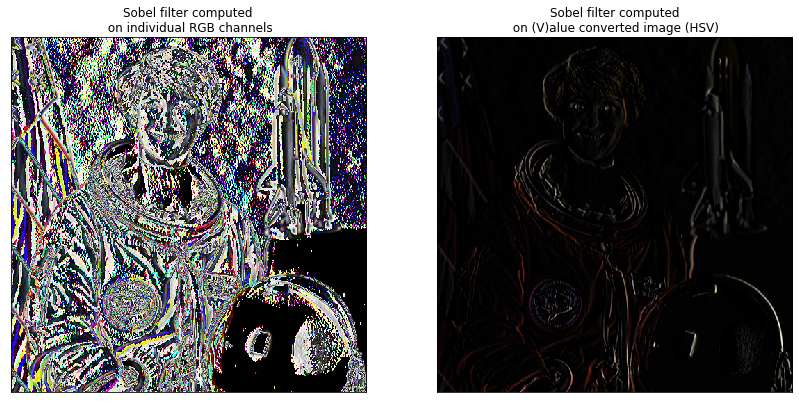

In [27]:
# При помощи декораторов добавим обработку изображений.
@adapt_rgb(each_channel)
def sobel_each(image):
    return ndimage.filters.sobel(image)

@adapt_rgb(hsv_value)
def sobel_hsv(image):
    return ndimage.filters.sobel(image)

image = skimage.data.astronaut()

fig, (ax_each, ax_hsv) = plt.subplots(ncols=2, figsize=(14, 7))

# We use 1 - sobel_each(image) but this won't work if image is not normalized
ax_each.imshow(rescale_intensity(1 - sobel_each(image)))
ax_each.set_xticks([]), ax_each.set_yticks([])
ax_each.set_title("Sobel filter computed\n on individual RGB channels")

# We use 1 - sobel_hsv(image) but this won't work if image is not normalized
ax_hsv.imshow(rescale_intensity(1 - sobel_hsv(image)))
ax_hsv.set_xticks([]), ax_hsv.set_yticks([])
ax_hsv.set_title("Sobel filter computed\n on (V)alue converted image (HSV)")


Метод `find_contour` позволяет найти фрагменты изображений с одинаковыми значениями.

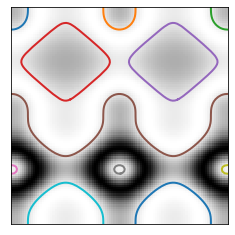

In [194]:
# Construct some test data
x, y = np.ogrid[-np.pi:np.pi:100j, -np.pi:np.pi:100j]
r = np.sin(np.exp((np.sin(x)**3 + np.cos(y)**2)))

# Find contours at a constant value of 0.8.
contours = skimage.measure.find_contours(r, 0.8)

# Display the image and plot all contours found.
fig, ax = plt.subplots()
ax.imshow(r, cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [52]:
contours

[array([[90.31336728,  0.        ],
        [90.21911322,  1.        ],
        [90.        ,  1.77356498],
        [89.9469188 ,  2.        ],
        [89.55931029,  3.        ],
        [89.01277051,  4.        ],
        [89.        ,  4.01858462],
        [88.41813228,  5.        ],
        [88.        ,  5.58103951],
        [87.73152869,  6.        ],
        [87.        ,  6.98249248],
        [86.98804327,  7.        ],
        [86.2321828 ,  8.        ],
        [86.        ,  8.27946562],
        [85.43809138,  9.        ],
        [85.        ,  9.52264232],
        [84.61452769, 10.        ],
        [84.        , 10.72322658],
        [83.76736335, 11.        ],
        [83.        , 11.88516595],
        [82.89876907, 12.        ],
        [82.007305  , 13.        ],
        [82.        , 13.00825042],
        [81.08449021, 14.        ],
        [81.        , 14.09329819],
        [80.11401335, 15.        ],
        [80.        , 15.12151498],
        [79.07329779, 16.   

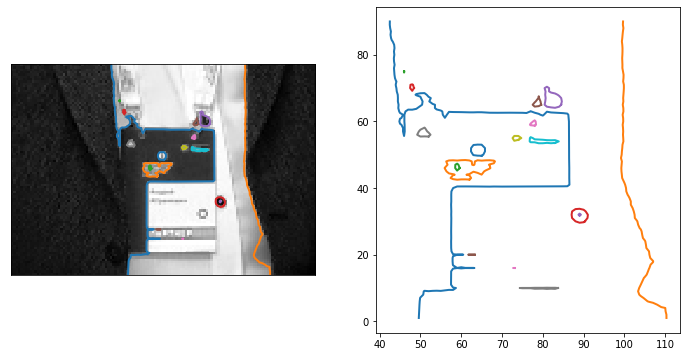

In [196]:
# Construct some test data
#x, y = np.ogrid[-np.pi:np.pi:100j, -np.pi:np.pi:100j]
#r = np.sin(np.exp((np.sin(x)**3 + np.cos(y)**2)))
red4 = np.array([[pix4[x, y][0] for x in range(badge4.size[0])] for y in range(badge4.size[1])])

# Find contours at a constant value of 64
contours = skimage.measure.find_contours(red4, 128)

# Display the image and plot all contours found
fig, axes = plt.subplots(1, 2, figsize = (12,6))
axes[0].imshow(red4, cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    axes[0].plot(contour[:, 1], contour[:, 0], linewidth=2)
    axes[1].plot(contour[:, 1], 90-contour[:, 0], linewidth=2)

axes[0].axis('image')
axes[0].set_xticks([])
axes[0].set_yticks([])
plt.show()

In [63]:
contours

[array([[89.        , 48.61111111],
        [88.        , 48.90909091],
        [87.91304348, 49.        ],
        [87.        , 49.168     ],
        [86.        , 49.2556391 ],
        [85.        , 49.29323308],
        [84.        , 49.33333333],
        [83.        , 49.41129032],
        [82.        , 49.74074074],
        [81.        , 49.625     ],
        [80.03571429, 50.        ],
        [80.        , 50.04761905],
        [79.52380952, 51.        ],
        [79.37837838, 52.        ],
        [79.26315789, 53.        ],
        [79.31707317, 54.        ],
        [79.11428571, 55.        ],
        [79.        , 55.8       ],
        [78.8       , 56.        ],
        [79.        , 56.5       ],
        [79.0212766 , 57.        ],
        [79.        , 57.00775194],
        [78.        , 57.02272727],
        [77.        , 57.01574803],
        [76.6       , 57.        ],
        [76.        , 56.57142857],
        [75.        , 56.16666667],
        [74.75      , 56.   

Фильтр Собеля находит только вертикальные границы. В библиотеке skimage имеется несколько более корректных фильтров, работающих в любом направлении.

In [7]:
from skimage.filters import meijering, sato, frangi, hessian

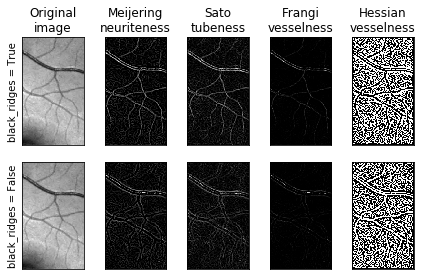

In [65]:
def identity(image, **kwargs):
    """Return the original image, ignoring any kwargs."""
    return image

# Более правильное преобразование к оттенкам серого.
image = skimage.color.rgb2gray(skimage.data.retina())[300:700, 700:900]
cmap = plt.cm.gray

kwargs = {}
kwargs['sigmas'] = [1]

fig, axes = plt.subplots(2, 5)
for i, black_ridges in enumerate([1, 0]):
    for j, func in enumerate([identity, meijering, sato, frangi, hessian]):
        kwargs['black_ridges'] = black_ridges
        result = func(image, **kwargs)
        if func in (meijering, frangi):
            # Crop by 4 pixels for rendering purpose.
            result = result[4:-4, 4:-4]
        axes[i, j].imshow(result, cmap=cmap, aspect='auto')
        if i == 0:
            axes[i, j].set_title(['Original\nimage', 'Meijering\nneuriteness',
                                  'Sato\ntubeness', 'Frangi\nvesselness',
                                  'Hessian\nvesselness'][j])
        if j == 0:
            axes[i, j].set_ylabel('black_ridges = ' + str(bool(black_ridges)))
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

plt.tight_layout()
plt.show()

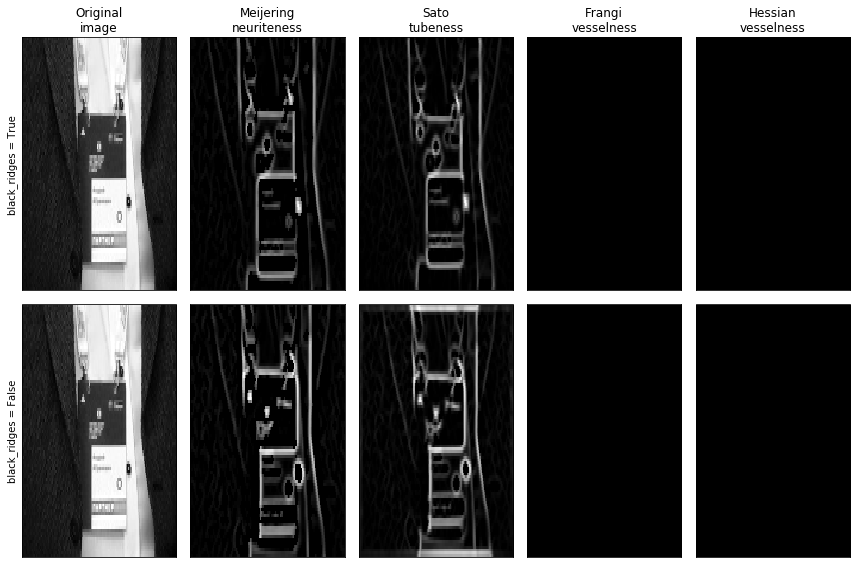

In [66]:
# Еще раз, но на нашем изображении.
image = skimage.color.rgb2gray(red4)
cmap = plt.cm.gray

kwargs = {}
kwargs['sigmas'] = [1]

fig, axes = plt.subplots(2, 5, figsize=(12,8))
for i, black_ridges in enumerate([1, 0]):
    for j, func in enumerate([identity, meijering, sato, frangi, hessian]):
        kwargs['black_ridges'] = black_ridges
        result = func(image, **kwargs)
        if func in (meijering, frangi):
            # Crop by 4 pixels for rendering purpose.
            result = result[4:-4, 4:-4]
        axes[i, j].imshow(result, cmap=cmap, aspect='auto')
        if i == 0:
            axes[i, j].set_title(['Original\nimage', 'Meijering\nneuriteness',
                                  'Sato\ntubeness', 'Frangi\nvesselness',
                                  'Hessian\nvesselness'][j])
        if j == 0:
            axes[i, j].set_ylabel('black_ridges = ' + str(bool(black_ridges)))
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

plt.tight_layout()
plt.show()

Преобразование Хафа позволяет понять, есть ли линии на изображении.

In [8]:
from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from matplotlib import cm

(360,)


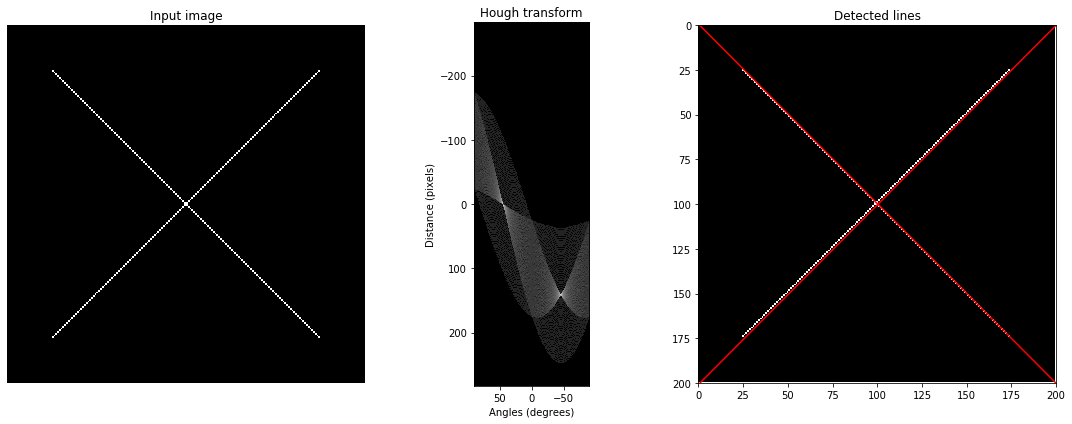

In [9]:
# Constructing test image
image = np.zeros((200, 200))
idx = np.arange(25, 175)
image[idx[::-1], idx] = 255
image[idx, idx] = 255

# Classic straight-line Hough transform
# Set a precision of 0.5 degree.
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360)
h, theta, d = hough_line(image, theta=tested_angles)
print(theta.shape)
# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
             cmap=cm.gray, aspect=1/1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray)
origin = np.array((0, image.shape[1]))
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    ax[2].plot(origin, (y0, y1), '-r')
ax[2].set_xlim(origin)
ax[2].set_ylim((image.shape[0], 0))
#ax[2].set_axis_off()
ax[2].set_title('Detected lines')

plt.tight_layout()
plt.show()

In [10]:
hough_line_peaks(h, theta, d)

(array([145, 138], dtype=uint64),
 array([ 0.78321042, -0.78321042]),
 array([141.75044248,   0.50088496]))

In [11]:
(0.50088496 - origin * np.cos(-0.78321042)) / np.sin(-0.78321042)

array([ -0.70991311, 200.16710434])

In [12]:
h, theta, d

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint64),
 array([-1.57079633, -1.56204537, -1.55329442, -1.54454346, -1.53579251,
        -1.52704155, -1.5182906 , -1.50953965, -1.50078869, -1.49203774,
        -1.48328678, -1.47453583, -1.46578487, -1.45703392, -1.44828296,
        -1.43953201, -1.43078106, -1.4220301 , -1.41327915, -1.40452819,
        -1.39577724, -1.38702628, -1.37827533, -1.36952437, -1.36077342,
        -1.35202247, -1.34327151, -1.33452056, -1.3257696 , -1.31701865,
        -1.30826769, -1.29951674, -1.29076578, -1.28201483, -1.27326387,
        -1.26451292, -1.25576197, -1.24701101, -1.23826006, -1.2295091 ,
        -1.22075815, -1.21200719, -1.20325624, -1.19450528, -1.18575433,
        -1.17700338, -1.16825242, -1.15950147, -1.15075051, -1.14199956,
        -1.1332486 , -1.12449765, -1.115746

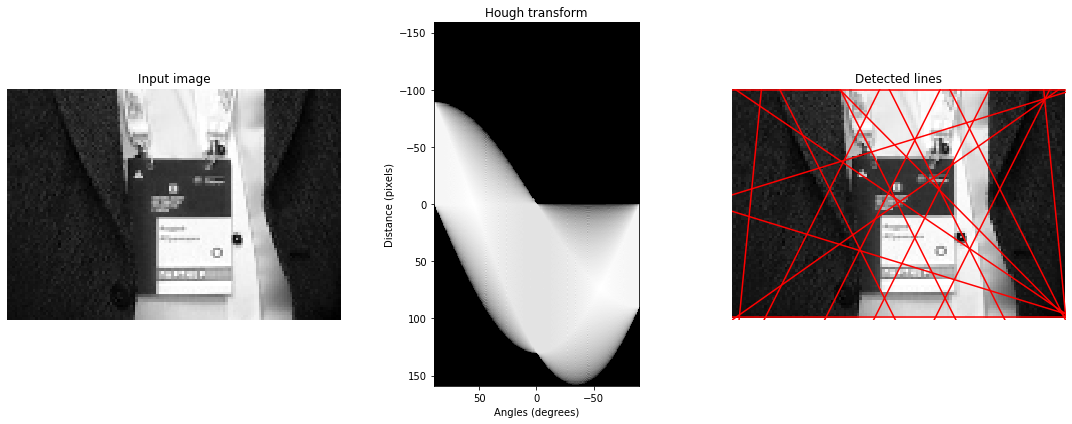

In [22]:
#tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 120)
h, theta, d = hough_line(red4)#, theta=tested_angles)

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(red4, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
             cmap=cm.gray, aspect=1/1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(red4, cmap=cm.gray)
origin = np.array((0, red4.shape[1]))
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    ax[2].plot(origin, (y0, y1), '-r')
ax[2].set_xlim(origin)
ax[2].set_ylim((red4.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

plt.tight_layout()
plt.show()

In [114]:
#origin = np.array((0, image.shape[1]))
origin = np.array((0, textimage.shape[1]))
#origin
(dist - origin * np.cos(angle)) / np.sin(angle)

array([662.87216842, 718.43701639])

In [24]:
from skimage.transform import probabilistic_hough_line
from skimage.feature import canny
from skimage.draw import line

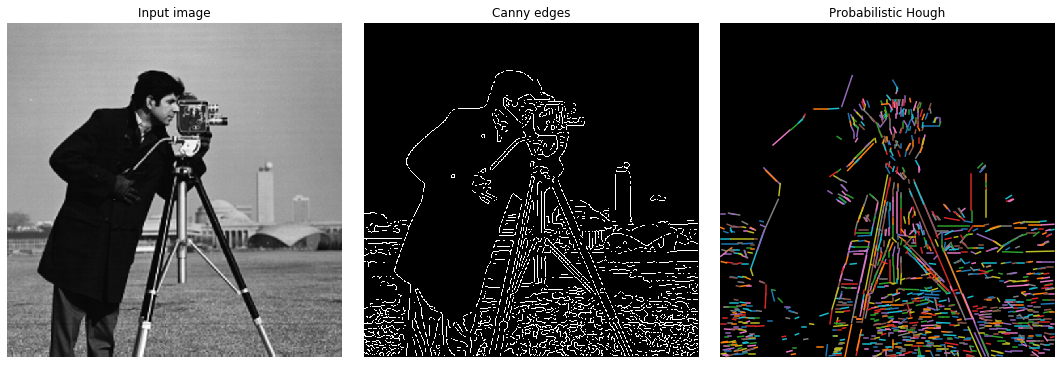

In [25]:
# Line finding using the Probabilistic Hough Transform
image = skimage.data.camera()
edges = canny(image, 2, 1, 25)
lines = probabilistic_hough_line(edges, threshold=10, line_length=5,
                                 line_gap=3)

# Generating figure 2
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(edges, cmap=cm.gray)
ax[1].set_title('Canny edges')

ax[2].imshow(edges * 0)
for line in lines:
    p0, p1 = line
    ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_title('Probabilistic Hough')

for a in ax:
    a.set_axis_off()

plt.tight_layout()
plt.show()

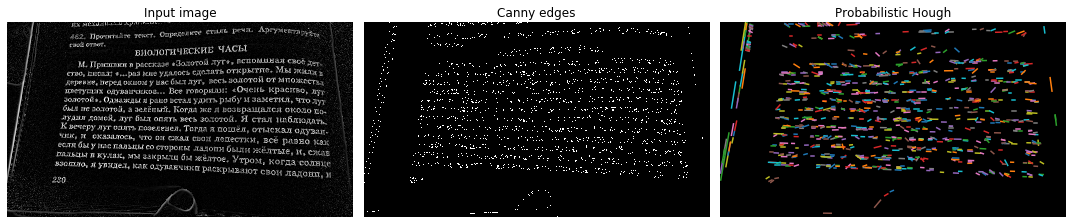

In [45]:
textimage1 = Image.open('data/236176915_a2c586e9b0a3b461228f38ee1c244f8d.jpg')
#textimage1 = textimage1.crop((0,0,450,750))
text_pix = textimage1.load()
#textimage2 = np.array([[(text_pix[x, y][0]+text_pix[x, y][1]+text_pix[x, y][2])/3
textimage2 = np.array([[(text_pix[x, y][0]+text_pix[x, y][1]+text_pix[x, y][2])/3
                       for x in range(textimage1.size[0])] for y in range(textimage1.size[1])])
#textimage = scipy.ndimage.gaussian_filter(textimage2, 2)
textimage = meijering(textimage2)

edges = canny(textimage, 3)
lines = probabilistic_hough_line(edges, line_length=25)
#lines = probabilistic_hough_line(textimage, line_length=25)

# # Generating figure 2
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(textimage, cmap=cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(edges, cmap=cm.gray)
ax[1].set_title('Canny edges')

ax[2].imshow(edges * 0)
for line in lines[:1000]:
    p0, p1 = line
    ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, textimage.shape[1]))
ax[2].set_ylim((textimage.shape[0], 0))
ax[2].set_title('Probabilistic Hough')

for a in ax:
    a.set_axis_off()

plt.tight_layout()
plt.show()

In [33]:
edges

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [173]:
from skimage.transform import swirl

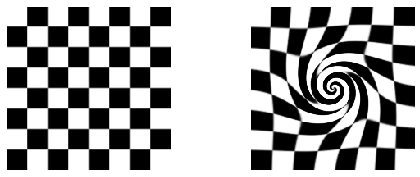

In [202]:
image = skimage.data.checkerboard()
swirled = swirl(image, rotation=0, strength=10, radius=120)

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3),
                               sharex=True, sharey=True)

ax0.imshow(image, cmap=plt.cm.gray)
ax0.axis('off')
ax1.imshow(swirled, cmap=plt.cm.gray)
ax1.axis('off')

plt.show()

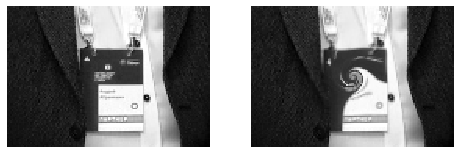

In [175]:
swirled = swirl(red4, rotation=0, strength=10, radius=30)

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3),
                               sharex=True, sharey=True)

ax0.imshow(red4, cmap=plt.cm.gray)
ax0.axis('off')
ax1.imshow(swirled, cmap=plt.cm.gray)
ax1.axis('off')

plt.show()

In [176]:
from skimage.transform import rescale, resize, downscale_local_mean

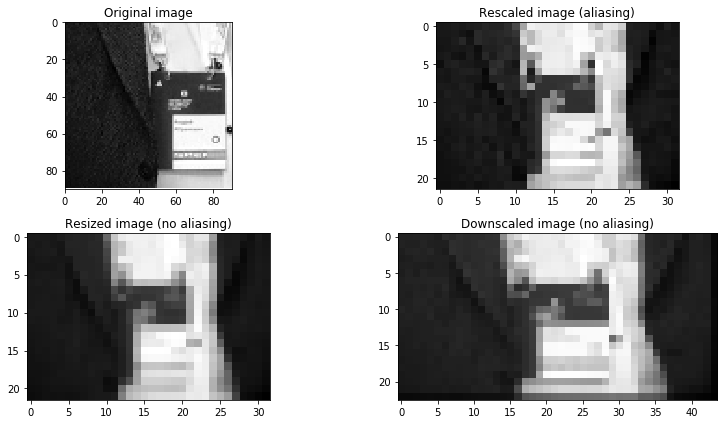

In [177]:
image_rescaled = rescale(red4, 0.25, anti_aliasing=False)
image_resized = resize(red4, (red4.shape[0] // 4, red4.shape[1] // 4),
                       anti_aliasing=True)
image_downscaled = downscale_local_mean(red4, (4, 3))

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6))

ax = axes.ravel()

ax[0].imshow(red4, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(image_rescaled, cmap='gray')
ax[1].set_title("Rescaled image (aliasing)")

ax[2].imshow(image_resized, cmap='gray')
ax[2].set_title("Resized image (no aliasing)")

ax[3].imshow(image_downscaled, cmap='gray')
ax[3].set_title("Downscaled image (no aliasing)")

ax[0].set_xlim(0, red4.shape[0])
ax[0].set_ylim(red4.shape[0], 0)
plt.tight_layout()
plt.show()

In [178]:
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk

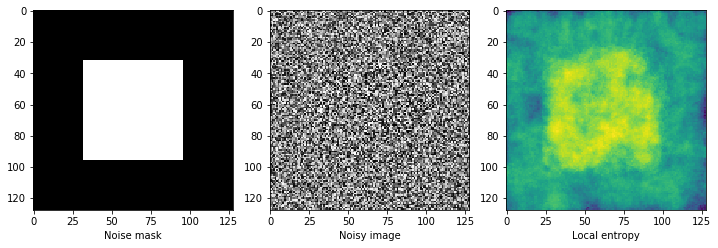

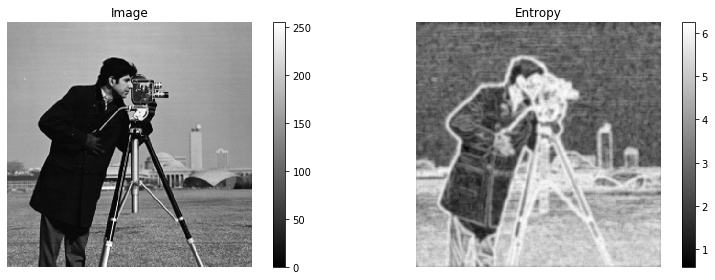

In [180]:
# First example: object detection.

noise_mask = np.full((128, 128), 28, dtype=np.uint8)
noise_mask[32:-32, 32:-32] = 30

noise = (noise_mask * np.random.random(noise_mask.shape) - 0.5 *
         noise_mask).astype(np.uint8)
img = noise + 128

entr_img = entropy(img, disk(10))

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

ax0.imshow(noise_mask, cmap='gray')
ax0.set_xlabel("Noise mask")
ax1.imshow(img, cmap='gray')
ax1.set_xlabel("Noisy image")
ax2.imshow(entr_img, cmap='viridis')
ax2.set_xlabel("Local entropy")

fig.tight_layout()

# Second example: texture detection.

image = img_as_ubyte(skimage.data.camera())

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 4),
                               sharex=True, sharey=True)

img0 = ax0.imshow(image, cmap=plt.cm.gray)
ax0.set_title("Image")
ax0.axis("off")
fig.colorbar(img0, ax=ax0)

img1 = ax1.imshow(entropy(image, disk(5)), cmap='gray')
ax1.set_title("Entropy")
ax1.axis("off")
fig.colorbar(img1, ax=ax1)

fig.tight_layout()

plt.show()

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:503: UserWarning: Downcasting int64 to uint8 without scaling because max value 255 fits in uint8
  return convert(image, np.uint8, force_copy)


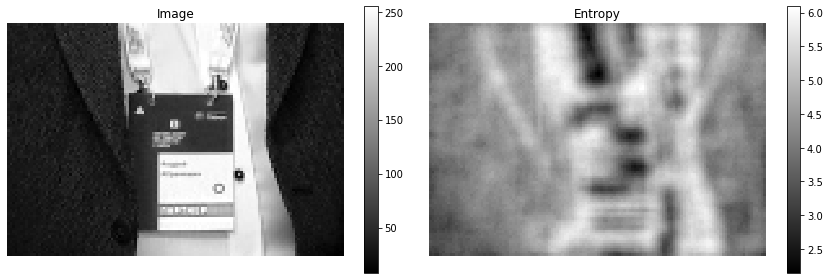

In [181]:

image = img_as_ubyte(red4)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 4),
                               sharex=True, sharey=True)

img0 = ax0.imshow(image, cmap=plt.cm.gray)
ax0.set_title("Image")
ax0.axis("off")
fig.colorbar(img0, ax=ax0)

img1 = ax1.imshow(entropy(image, disk(5)), cmap='gray')
ax1.set_title("Entropy")
ax1.axis("off")
fig.colorbar(img1, ax=ax1)

fig.tight_layout()

plt.show()

In [15]:
from skimage.feature import Cascade
from matplotlib import patches

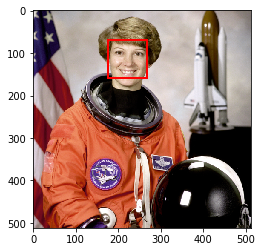

In [16]:
# Load the trained file from the module root.
trained_file = skimage.data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade.
detector = Cascade(trained_file)

img = skimage.data.astronaut()

detected = detector.detect_multi_scale(img=img,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(60, 60),
                                       max_size=(123, 123))

plt.imshow(img)
img_desc = plt.gca()
plt.set_cmap('gray')

for patch in detected:

    img_desc.add_patch(
        patches.Rectangle(
            (patch['c'], patch['r']),
            patch['width'],
            patch['height'],
            fill=False,
            color='r',
            linewidth=2
        )
    )

plt.show()

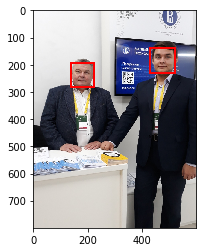

CPU times: user 2.71 s, sys: 9.42 ms, total: 2.72 s
Wall time: 1.29 s


In [17]:
%%time

# Load the trained file from the module root.
trained_file = skimage.data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade.
detector = Cascade(trained_file)

img1 = Image.open('data/MIEM_1.jpg')
img1p = img1.load()
img = np.array([[[img1p[x,y][0], img1p[x,y][1], img1p[x,y][2]] for x in range(img1.size[0])]  
                for y in range(img1.size[1])])

detected = detector.detect_multi_scale(img=img,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(60, 60),
                                       max_size=(123, 123))

plt.imshow(img)
img_desc = plt.gca()
plt.set_cmap('gray')

for patch in detected:

    img_desc.add_patch(
        patches.Rectangle(
            (patch['c'], patch['r']),
            patch['width'],
            patch['height'],
            fill=False,
            color='r',
            linewidth=2
        )
    )

plt.show()

In [224]:
aaa = np.zeros((10, 10))
ind = range(10)
aaa[ind,ind] = 1
aaa[:5,:5][aaa[:5,:5]<0.5]=3

In [226]:
aaa

array([[1., 3., 3., 3., 3., 0., 0., 0., 0., 0.],
       [3., 1., 3., 3., 3., 0., 0., 0., 0., 0.],
       [3., 3., 1., 3., 3., 0., 0., 0., 0., 0.],
       [3., 3., 3., 1., 3., 0., 0., 0., 0., 0.],
       [3., 3., 3., 3., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])